Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression & Classification, Module 1

- Clean your data and remove outliers
- Plot relationship between feature and target
- Begin with baselines for regression
- Use scikit-learn to fit a linear regression
- Make new predictions and explain coefficients

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).



In [0]:
# another way to import a csv file from github.
import os, sys
in_colab = 'google.colab' in sys.modules
# if you're in Colab...
if in_colab:
    # pull files from Github repo.
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    # install required python packages.
    !pip install -r requirements.txt    
    # change into directory for module.
    os.chdir('module1')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# Explore your data and remove outliers

## Overview

### Predict how much a NYC condo costs 🏠💸

[Amateurs & Experts Guess How Much a NYC Condo With a Private Terrace Costs](https://www.youtube.com/watch?v=JQCctBOgH9I)

> Real Estate Agent Leonard Steinberg just sold a pre-war condo in New York City's Tribeca neighborhood. We challenged three people - an apartment renter, an apartment owner and a real estate expert - to try to guess how much the apartment sold for. Leonard reveals more and more details to them as they refine their guesses.


The condo is 1,497 square feet.

Here are the final guesses:

- Apartment Renter: \$15 million
- Apartment Buyer: \$2.2 million
- Real Estate Expert: \$2.2 million

Let's see how we compare!

First, we need data:

- [Kaggle has NYC property sales data](https://www.kaggle.com/new-york-city/nyc-property-sales), but it's not up-to-date.
- The data comes from the [New York City Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page). There's also a glossary of property sales terms and NYC Building Class Code Descriptions
- The data can also be found on the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Follow Along

In [0]:
# import pandas.
import pandas as pd
# import pandas profiling, 'gives extra data'.
import pandas_profiling

In [0]:
# read New York City property sales data.
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')
# change column names: replace spaces with underscores.
df.columns = [col.replace(' ', '_') for col in df]
# get pandas profiling report.
df.profile_report()

In [0]:
# Does this data include the 'Tribeca' neighborhood?
mask = df['NEIGHBORHOOD'].str.contains('TRIBECA')
df[mask]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
220,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,222,1013,NaN,R4,"181 HUDSON STREET, 6D",6D,10013.0,1.0,0.0,1.0,"7,878",1840.0,1909.0,2,R4,"$ 2,800,000",01/03/2019
763,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,9022,NaN,R4,"10 LITTLE WEST STREET, 19A",19A,10004.0,1.0,0.0,1.0,0,1759.0,0.0,2,R4,"$ 2,650,000",01/07/2019
996,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,212,1404,NaN,R4,"11 BEACH STREET, 1D",1D,10013.0,1.0,0.0,1.0,"11,213",2651.0,1900.0,2,R4,$ - 0,01/08/2019
1276,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,1441,NaN,R4,"30 LITTLE WEST STREET, 7G",7G,10004.0,1.0,0.0,1.0,0,1190.0,2005.0,2,R4,"$ 1,005,000",01/09/2019
1542,1,TRIBECA,02 TWO FAMILY DWELLINGS,1,132,26,NaN,S2,"75 WARREN STREET, XX",NaN,10007.0,2.0,1.0,3.0,"1,819",10117.0,1905.0,1,S2,"$ 12,950,000",01/10/2019
1543,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,3624,NaN,R4,"2 RIVER TERRACE, 4C",4C,0.0,1.0,0.0,1.0,0,1088.0,2006.0,2,R4,"$ 1,678,000",01/10/2019
1855,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,2610,NaN,R4,"380 RECTOR PLACE, 10A",10A,10280.0,1.0,0.0,1.0,0,873.0,0.0,2,R4,"$ 1,380,000",01/11/2019
2170,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,142,1903,NaN,R4,"111 MURRAY STREET, 37W",37W,10007.0,1.0,0.0,1.0,0,2279.0,2016.0,2,R4,"$ 6,924,100",01/14/2019
2413,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,2506,NaN,R4,"300 ALBANY STREET, 9M",9M,10280.0,1.0,0.0,1.0,0,695.0,1986.0,2,R4,"$ 501,000",01/15/2019
2414,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,16,3703,NaN,R4,"1 RIVER TERRACE, 9M",9M,0.0,1.0,0.0,1.0,0,1449.0,2006.0,2,R4,"$ 2,400,000",01/15/2019


In [0]:
# save 'TRIBECA' only to the data set.
df = df[mask]
# show the data frame shape, down from > 20k rows to < 150, why?
df.shape

(146, 21)

In [0]:
# why so few property sales in Tribeca?
# check the date range of the data.
# It's just the first 4 months of 2019.
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)
df['SALE_DATE'].describe()

count                     146
unique                     66
top       2019-02-12 00:00:00
freq                       17
first     2019-01-03 00:00:00
last      2019-04-30 00:00:00
Name: SALE_DATE, dtype: object

In [0]:
# see the pandas profiling report:
# SALE_PRICE was read as strings, change to int, get rid of bad #s.
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    # replace bad #s.
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    # change type to int.
    .astype(int)
)

In [0]:
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,146.0,146.000000,146.000000,0.0,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,1.460000e+02
mean,1.0,123.260274,1980.020548,NaN,9732.431507,2.897260,0.075342,2.965753,4573.842466,1595.226027,2.006849,8.884964e+06
std,0.0,83.673673,1738.253338,NaN,1842.620394,23.345894,0.440777,23.597316,25520.766334,780.746749,0.185568,2.363998e+07
min,1.0,16.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,1.0,16.000000,1112.250000,NaN,10007.000000,1.000000,0.000000,1.000000,862.000000,1905.000000,2.000000,9.768750e+05
50%,1.0,142.000000,1362.000000,NaN,10013.000000,1.000000,0.000000,1.000000,1787.500000,1986.000000,2.000000,2.750000e+06
75%,1.0,212.000000,2194.500000,NaN,10013.000000,1.000000,0.000000,1.000000,2522.250000,2006.000000,2.000000,7.131025e+06
max,1.0,224.000000,9057.000000,NaN,10282.000000,283.000000,4.000000,286.000000,305542.000000,2016.000000,4.000000,2.600000e+08


In [0]:
# SALE_PRICE is now a number, but hard to read in scientific notation.
# format numbers: comma separator for thousands, zero decimals.
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,146,146,146,0,146,146,146,146,146,146,146,146
mean,1,123,"1,980",nan,"9,732",3,0,3,"4,574","1,595",2,"8,884,964"
std,0,84,"1,738",nan,"1,843",23,0,24,"25,521",781,0,"23,639,981"
min,1,16,1,nan,0,0,0,0,0,0,1,0
25%,1,16,"1,112",nan,"10,007",1,0,1,862,"1,905",2,"976,875"
50%,1,142,"1,362",nan,"10,013",1,0,1,"1,788","1,986",2,"2,750,000"
75%,1,212,"2,194",nan,"10,013",1,0,1,"2,522","2,006",2,"7,131,025"
max,1,224,"9,057",nan,"10,282",283,4,286,"305,542","2,016",4,"260,000,000"


In [0]:
# max SCALE_PRICE is $260 million, is something wrong with the data?
# look at this 'max' observation.
# equivalent to: df.query('SALE_PRICE == 260000000')
df[df['SALE_PRICE']==260000000]

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
6499,1,TRIBECA,08 RENTALS - ELEVATOR APARTMENTS,2,224,1,nan,D8,34 DESBROSSES STREET,NaN,"10,013",283,3,286,"36,858","305,542","2,007",2,D8,260000000,2019-02-01


In [0]:
# how many property sales were for multiple units?
df['TOTAL_UNITS'].value_counts()

1      131
0       11
5        1
286      1
8        1
3        1
Name: TOTAL_UNITS, dtype: int64

In [0]:
# Keep only the single units.

# Would this be better though?
df = df.query('TOTAL_UNITS==1')
# df = df[(df.RESIDENTIAL_UNITS==1) & (df.COMMERICAL_UNITS==0)]
df.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
count,131,131,131,0,131,131,131,131,131,131,131,131
mean,1,118,"2,189",nan,"9,700",1,0,1,"2,520","1,572",2,"7,626,487"
std,0,86,"1,711",nan,"1,943",0,0,0,"4,772",805,0,"11,460,762"
min,1,16,"1,001",nan,0,0,0,1,432,0,2,0
25%,1,16,"1,130",nan,"10,007",1,0,1,982,"1,905",2,"978,750"
50%,1,141,"1,441",nan,"10,013",1,0,1,"1,900","1,987",2,"3,145,000"
75%,1,214,"2,450",nan,"10,280",1,0,1,"2,508","2,006",2,"7,461,000"
max,1,223,"9,057",nan,"10,282",1,1,1,"39,567","2,016",4,"39,285,000"


In [0]:
# now max sales price is $39 million, check it out.
# look at this observation.
# it's huge, over 8,000 square feet.
# maybe it's legit, just a huge, expensive condo.
df.query('SALE_PRICE == 39285000')

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
9236,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1144,nan,R4,"70 VESTRY STREET, 12S",12S,"10,013",1,0,1,0,"8,346","2,016",2,R4,39285000,2019-02-15


In [0]:
# The min sales price is $0, thats strange look into it.

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:

# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 

# How often did $0 sales occur in this subset of the data?
len(df.query('SALE_PRICE == 0'))
# works as well, df['SALE_PRICE'].value_counts()

15

In [0]:
# go back to look at the percentiles for sq ft from earlier.

# 75% percentile for gross square feet is 2,500, but the max is over 39,000 square feet.

# look at property sales for > 5,000 square feet.

# we see the same condo we looked at earlier,
# plus two property sales at 39,567 square feet.
# TOTAL_UNITS = 1, but BUILDING_CLASS_CATEGORY = 2-10 UNIT RESIDENTIAL
# is this dirty data?

df.query('GROSS_SQUARE_FEET > 5000')

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
9236,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1144,nan,R4,"70 VESTRY STREET, 12S",12S,"10,013",1,0,1,0,"8,346","2,016",2,R4,39285000,2019-02-15
10487,1,TRIBECA,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,179,1607,nan,R1,"24 LEONARD ST, PH W",PH W,"10,013",1,0,1,"9,983","39,567","1,940",2,R1,9857100,2019-02-22
16008,1,TRIBECA,15 CONDOS - 2-10 UNIT RESIDENTIAL,2C,179,1602,nan,R1,"24 LEONARD STREET, 2",2,"10,013",1,0,1,"9,983","39,567","1,940",2,R1,9718000,2019-03-21


In [0]:
# What are the building class categories?
# How frequently does each occur?
df['BUILDING_CLASS_CATEGORY'].value_counts()

13 CONDOS - ELEVATOR APARTMENTS               121
15 CONDOS - 2-10 UNIT RESIDENTIAL               8
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      1
46 CONDO STORE BUILDINGS                        1
Name: BUILDING_CLASS_CATEGORY, dtype: int64

In [0]:
# keep subset of rows:
# sale price more> than $0, building class category == 13 condos - elevator apartments.
mask = (df['SALE_PRICE'] > 0) & (df['BUILDING_CLASS_CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS')
df = df[mask]
# down to 106 rows.
df.shape

(106, 21)

## Challenge

In your assignment, you'll use another New York City real estate dataset. You'll predict how much it costs to rent an apartment, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website. When you do the assignment, look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.

# Plot relationship between feature and target

## Overview

- [Plotly Express](https://plot.ly/python/plotly-express/) examples
- [plotly_express.scatter](https://www.plotly.express/plotly_express/#plotly_express.scatter) docs

## Follow Along

In [0]:
# px scatter plot, 'GROSS_SQUARE_FEET' vs'SALE_PRICE'.
import plotly.express as px
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE')

In [0]:
# with OLS (Ordinary Least Squares) trendline, the outliers influence the "line of best fit".
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE', trendline='ols')

In [0]:
# look at sales for more than $35 million.

# all are at 70 Vestry Street.
# all but one have the same SALE_PRICE & SALE_DATE.
# was the SALE_PRICE for each? Or in tital?
# is this dirty data?
df.query('SALE_PRICE > 35000000')

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
8370,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1105,nan,R4,"70 VESTRY STREET, 3C",3C,"10,013",1,0,1,0,"1,670","2,016",2,R4,36681561,2019-02-12
8371,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1123,nan,R4,"70 VESTRY STREET, 6C",6C,"10,013",1,0,1,0,"1,906","2,016",2,R4,36681561,2019-02-12
8372,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1124,nan,R4,"70 VESTRY STREET, 6D",6D,"10,013",1,0,1,0,"2,536","2,016",2,R4,36681561,2019-02-12
8373,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1125,nan,R4,"70 VESTRY STREET, 6E",6E,"10,013",1,0,1,0,"2,965","2,016",2,R4,36681561,2019-02-12
8374,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1126,nan,R4,"70 VESTRY STREET, 6F",6F,"10,013",1,0,1,0,"2,445","2,016",2,R4,36681561,2019-02-12
8375,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1127,nan,R4,"70 VESTRY STREET, 7A",7A,"10,013",1,0,1,0,"2,844","2,016",2,R4,36681561,2019-02-12
8376,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1128,nan,R4,"70 VESTRY STREET, 7B",7B,"10,013",1,0,1,0,"3,242","2,016",2,R4,36681561,2019-02-12
8377,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1129,nan,R4,"70 VESTRY STREET, 7C",7C,"10,013",1,0,1,0,"1,906","2,016",2,R4,36681561,2019-02-12
8378,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1130,nan,R4,"70 VESTRY STREET, 7D",7D,"10,013",1,0,1,0,"2,536","2,016",2,R4,36681561,2019-02-12
8379,1,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,2,223,1131,nan,R4,"70 VESTRY STREET, 7E",7E,"10,013",1,0,1,0,"2,965","2,016",2,R4,36681561,2019-02-12


In [0]:
# make a judgment call: remove sale > 35 mil.
# keep rows where sale price was < $35 million.
df = df.query('SALE_PRICE < 35000000')
# down to 90 rows.
df.shape

(90, 21)

## Challenge

In your assignment, you will choose a feature, and plot its relationship with the target.

# Begin with baselines for regression

## Overview

Now I've subset my data, I've removed what I've considered to be outliers. Before I make a _predictive_ model, just how would I _describe_ the sales price? 

Before we _predict_ it, we just want to be able to _describe_ it. With visualizations, like we did before, and even just with pandas methods like you've been using all throughout Lambda School. 

So I can do `df['SALE_PRICE'].describe()` and I can see that now in my
dataset the mean sale price is $3.9 million, when I've excluded those those outliers. 

The mean still is higher than the median, but you better believe it
would have been much higher if I hadn't excluded those outliers. So it all depends on our assumptions.

But here's the interesting thing: **we could use this one number as a "prediction", if we didn't have any data except for sales price...** 

Imagine we didn't have any any other information about condos, then what would you tell somebody? If you had some sales prices like this but you didn't have any of these other columns. If somebody asked you, "How much do you think a condo in Tribeca costs?"

You could say, "Well, I've got 90 sales prices here, and I see that on average they cost $3.9 nine million."

So we do this all the time in the real world. We use descriptive
statistics for prediction. And that's not wrong or bad, in fact **that's where you should start. This is called the _mean baseline_.**

## Follow Along

In [0]:
# The Mean Sale Price is $3.9 million.
# If we didn't use any data except sales prices,
# we could "predict" that Tribeca condos cost about $3.9 million.
# This is called the "mean baseline."
df['SALE_PRICE'].describe()

count           90
mean     3,928,736
std      3,621,996
min        424,770
25%      1,156,552
50%      2,750,000
75%      5,087,500
max     15,000,000
Name: SALE_PRICE, dtype: float64

In [0]:
# But we *can* use more data beyond the sales price.
# Re-plot the relationship between gross square feet and sale pruce.
px.scatter(df, x='GROSS_SQUARE_FEET', y='SALE_PRICE', trendline='ols')

## Challenge

In your assignment, after you remove outliers, what is the mean price in your subset of the data?

# Use scikit-learn to fit a linear regression

## Overview

#### Jake VanderPlas, [_Python Data Science Handbook_, Chapter 5.2: Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)

The best way to think about data within Scikit-Learn is in terms of tables of data. 

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png)

The features matrix is often stored in a variable named `X`. The features matrix is assumed to be two-dimensional, with shape `[n_samples, n_features]`, and is most often contained in a NumPy array or a Pandas `DataFrame`.

We also generally work with a label or target array, which by convention we will usually call `y`. The target array is usually one dimensional, with length `n_samples`, and is generally contained in a NumPy array or Pandas `Series`. The target array may have continuous numerical values, or discrete classes/labels. 

The target array is the quantity we want to _predict from the data_: in statistical terms, it is the dependent variable. 

Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the `fit()` method of the model instance.
5. Apply the Model to new data: For supervised learning, often we predict labels for unknown data using the `predict()` method.

## Follow Along

In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

features =['GROSS_SQUARE_FEET']
target = 'SALE_PRICE'
X = df[features]
y = df[target]

model.fit(X, y)

y_pred = model.predict(X)

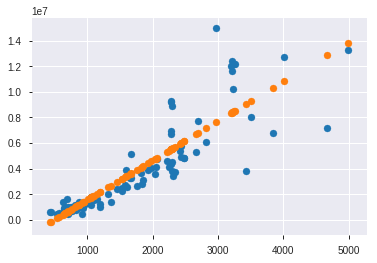

In [0]:
# plot actual vs predicted
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.scatter(X, y_pred);

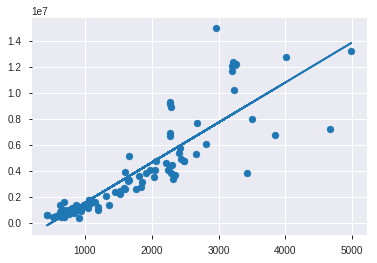

In [0]:
# interpolate
plt.scatter(X, y)
plt.plot(X, y_pred);

**What pattern did the model "learn", about the relationship between square feet & price?**

To help answer this question, we'll look at the  `coef_` and `intercept_` attributes of the `LinearRegression` object, which are documented here: 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [0]:
# model coefficient.
model.coef_[0]

3076.4476554190023

In [0]:
# model intercept.
model.intercept_

-1505364.0408585514

In [0]:
# Equations for a line, y = mx+b.
print('y = mx + b')
print(f'y = {model.coef_[0]} * x + {model.intercept_}')
print(f'price = {model.coef_[0]} * square_feet + {model.intercept_}')

y = mx + b
y = 3076.4476554190023 * x + -1505364.0408585514
price = 3076.4476554190023 * square_feet + -1505364.0408585514


In [0]:
# 5. apply the model to *new/unknown* data.
# create a function to predict 'square_feet'.
def predict(square_feet):
    y_pred = model.predict([[square_feet]])
    return y_pred[0]

predict(1497)

3100078.099303695

In [0]:
# Give a nicer output.
def predict(square_feet):
    y_pred = model.predict([[square_feet]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    # Format with $ and comma separators. No decimals.
    result = f'${estimate:,.0f} estimated price for {square_feet:,.0f} square foot condo in Tribeca.'
    explanation = f' Each additional square foot is associated with a ${coefficient:,.0f} increase in this model.'
    return result + explanation

predict(1497)

'$3,100,078 estimated price for 1,497 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [0]:
# What does the model for low square footage?
predict(500)

'$32,860 estimated price for 500 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [0]:
# For high square footage?
predict(10000)

'$29,259,113 estimated price for 10,000 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [0]:
# These values are outside the min & max of the data the model was fit on, but predictive models assume future data will have similar distribution.
df['SALE_PRICE'].describe()

count           90
mean     3,928,736
std      3,621,996
min        424,770
25%      1,156,552
50%      2,750,000
75%      5,087,500
max     15,000,000
Name: SALE_PRICE, dtype: float64

In [0]:
# show the statistic
df['GROSS_SQUARE_FEET'].describe()

count      90
mean    1,766
std     1,019
min       432
25%       874
50%     1,626
75%     2,308
max     4,986
Name: GROSS_SQUARE_FEET, dtype: float64

In [0]:
# show prediction of a 630 sqft condo.
predict(630)

'$432,798 estimated price for 630 square foot condo in Tribeca. Each additional square foot is associated with a $3,076 increase in this model.'

In [0]:
# re-run the prediction functon interactively.
from ipywidgets import interact
interact(predict, square_feet = (630, 5000)); # (min, max)

interactive(children=(IntSlider(value=2815, description='square_feet', max=5000, min=630), Output()), _dom_cla…

In [0]:
# import interact from ipywidgets.
from ipywidgets import interact
# create an interactive widget.
interact(predict, square_feet=(630, 5000));

interactive(children=(IntSlider(value=2815, description='square_feet', max=5000, min=630), Output()), _dom_cla…

### Organize & comment code

Putting it all together!

In [0]:
from ipywidgets import interact
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read New York City property sales data, from first 4 months of 2019.
# Dataset has 23040 rows, 21 columns.
df = pd.read_csv('../data/NYC_Citywide_Rolling_Calendar_Sales.csv')
assert df.shape == (23040, 21)
# Change column names. Replace spaces with underscores
df.columns = [col.replace(' ', '_') for col in df]
# Remove symbols from SALE_PRICE string, convert to integer
df['SALE_PRICE'] = (
    df['SALE_PRICE']
    .str.replace('$','')
    .str.replace('-','')
    .str.replace(',','')
    .astype(int)
)
# Keep subset of rows:
# Tribeca neighborhood, Condos - Elevator Apartments, 
# 1 unit, sale price more than $1, less than $35 million
mask = (
    (df['NEIGHBORHOOD'].str.contains('TRIBECA')) & 
    (df['BUILDING_CLASS_CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS') &
    (df['TOTAL_UNITS'] == 1) & 
    (df['SALE_PRICE'] > 0) & 
    (df['SALE_PRICE'] < 35000000)
)
df = df[mask]
# Data now has 90 rows, 21 columns
assert df.shape == (90, 21)
# Convert SALE_DATE to datetime
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'], infer_datetime_format=True)
# Arrange X features matrix & y target vector
features = ['GROSS_SQUARE_FEET']
target = 'SALE_PRICE'
X = df[features]
y = df[target]
# Fit model
model = LinearRegression()
model.fit(X, y)
# Predict
def predict(square_feet):
    y_pred = model.predict([[square_feet]])
    estimate = y_pred[0]
    coefficient = model.coef_[0]
    # Format with $ and comma separators. No decimals.
    result = f'${estimate:,.0f} estimated price for {square_feet:,.0f} square foot condo in Tribeca.'
    explanation = f' Each additional square foot adds about ${coefficient:,.0f}'
    return result + explanation

interact(predict, square_feet=(630, 5000)); # (min, max)

interactive(children=(IntSlider(value=2815, description='square_feet', max=5000, min=630), Output()), _dom_cla…

### How'd we do? ...

[Amateurs & Experts Guess How Much a NYC Condo With a Private Terrace Costs](https://www.youtube.com/watch?v=JQCctBOgH9I)

> Real Estate Agent Leonard Steinberg just sold a pre-war condo in New York City's Tribeca neighborhood. We challenged three people - an apartment renter, an apartment owner and a real estate expert - to try to guess how much the apartment sold for. Leonard reveals more and more details to them as they refine their guesses.


The condo is 1,497 square feet.

Here are the final guesses from the video:

- Apartment Renter: \$15 million
- Apartment Buyer: \$2.2 million
- Real Estate Expert: \$2.2 million

Here's our prediction from our model:

In [0]:
predict(1497)

'$3,100,078 estimated price for 1,497 square foot condo in Tribeca. Each additional square foot adds about $3,076'

___The final answer is revealed in [the video at 12:28](https://youtu.be/JQCctBOgH9I?t=748)!___

What was the error for our prediction, versus the people in the video?

## Challenge

In your assignment, you will define a function to make new predictions and explain the model coefficient.

# Review


You'll practice these objectives when you do your assignment:

- Clean your data and remove outliers
- Plot relationship between feature and target
- Begin with baselines for regression
- Use scikit-learn to fit a linear regression
- Make new predictions and explain coefficients


You'll use another New York City real estate dataset. You'll predict how much it costs to rent an apartment, instead of how much it costs to buy a condo.

You've been provided with a separate notebook for your assignment, which has all the instructions and stretch goals. Good luck and have fun!

# Sources

#### Plotly Express
- [Plotly Express](https://plot.ly/python/plotly-express/) examples
- [plotly_express.scatter](https://www.plotly.express/plotly_express/#plotly_express.scatter) docs

#### NYC Real Estate
- [Amateurs & Experts Guess How Much a NYC Condo With a Private Terrace Costs](https://www.youtube.com/watch?v=JQCctBOgH9I)
- [Kaggle has NYC property sales data](https://www.kaggle.com/new-york-city/nyc-property-sales), but it's not up-to-date.
- The data comes from the [New York City Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page). There's also a glossary of property sales terms and NYC Building Class Code Descriptions
- The data can also be found on the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

#### Scikit-Learn
- Jake VanderPlas, [_Python Data Science Handbook_, Chapter 5.2: Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API)
- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)